### Task 1:
1. Load the dataset into a Pandas data frame(train and test).
2. Perform data analysis to determine whether the data is ready for time series analysis; if not then prepare the data to perform time series analysis.
3. Perform visual inspections of the data.
4. Accomplish the decomposition of data. Does it have all the components required for a time series analysis?

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
store_c=pd.read_csv("DS3_C1_S4_SuperstoreSales_Data_Challenge.csv",parse_dates=['Order Date'])
store=store_c.copy()
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [3]:
store.rename(columns={'Order Date':'date'},inplace=True)

In [4]:
store.set_index('date',inplace=True)
store_bkp=store.copy()
store.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [5]:
store.sort_index(inplace=True)
store.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
date,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,01-10-2014,Standard Class,Home Office,United States,Henderson,Kentucky,42420,South,Furniture,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,01-12-2014,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Furniture,76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,1/15/2014,Standard Class,Corporate,United States,Springfield,Virginia,22153,South,Furniture,51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,1/14/2014,First Class,Consumer,United States,Dover,Delaware,19901,East,Furniture,9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,1/16/2014,Second Class,Consumer,United States,Mount Pleasant,South Carolina,29464,South,Furniture,545.940,6,0.0,87.3504


In [6]:
sales_df=pd.DataFrame(store['Sales'])
sales_df.head()

,Sales
date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


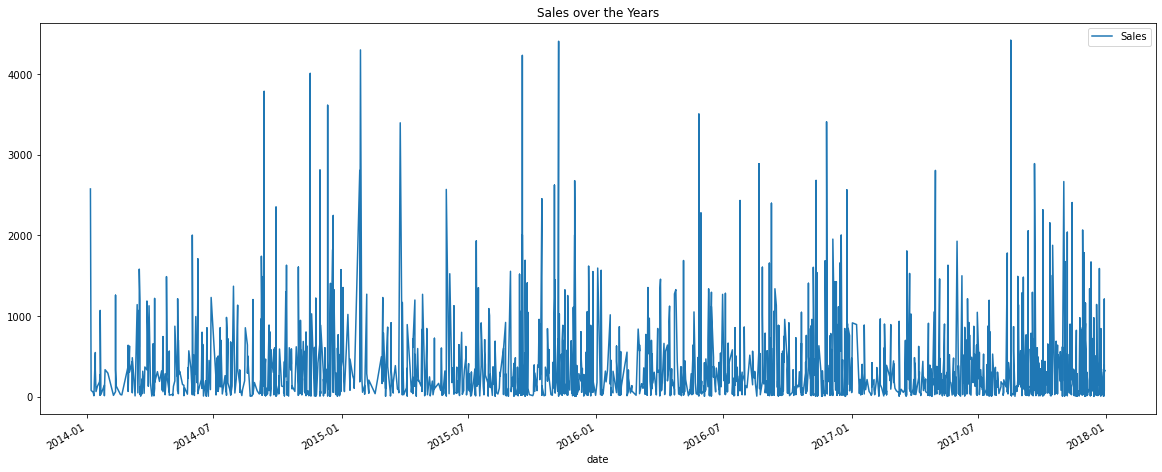

In [7]:
sales_df.plot(figsize=(20,8),title="Sales over the Years")
plt.show()

In [8]:
sales_df=sales_df.resample('M').mean()
sales_df.head()

,Sales
date,
2014-01-31,312.126250
2014-02-28,262.808286
2014-03-31,441.635030
2014-04-30,305.570654
2014-05-31,288.032792


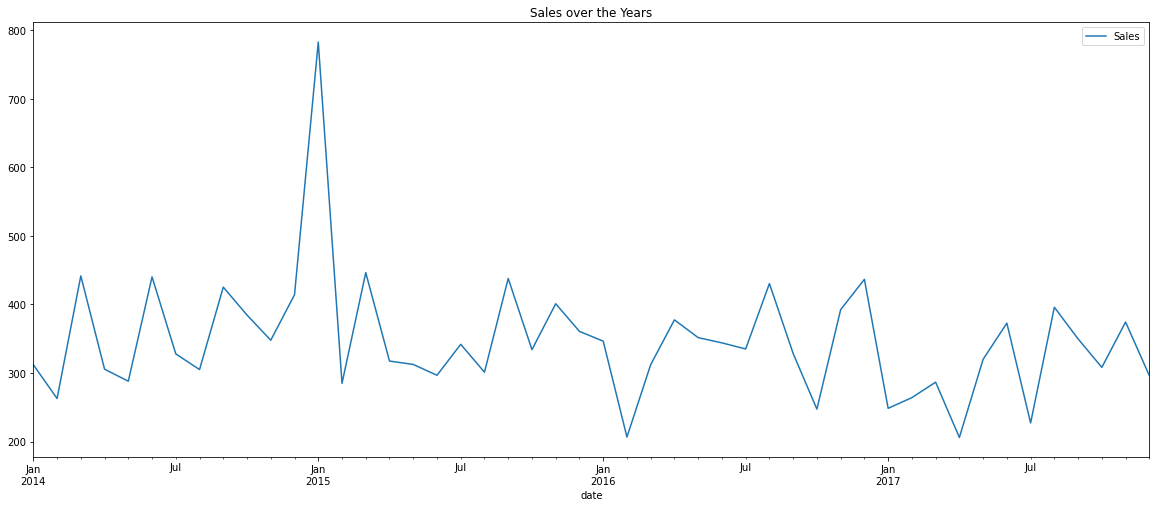

In [9]:
sales_df.plot(figsize=(20,8),title="Sales over the Years")
plt.show()

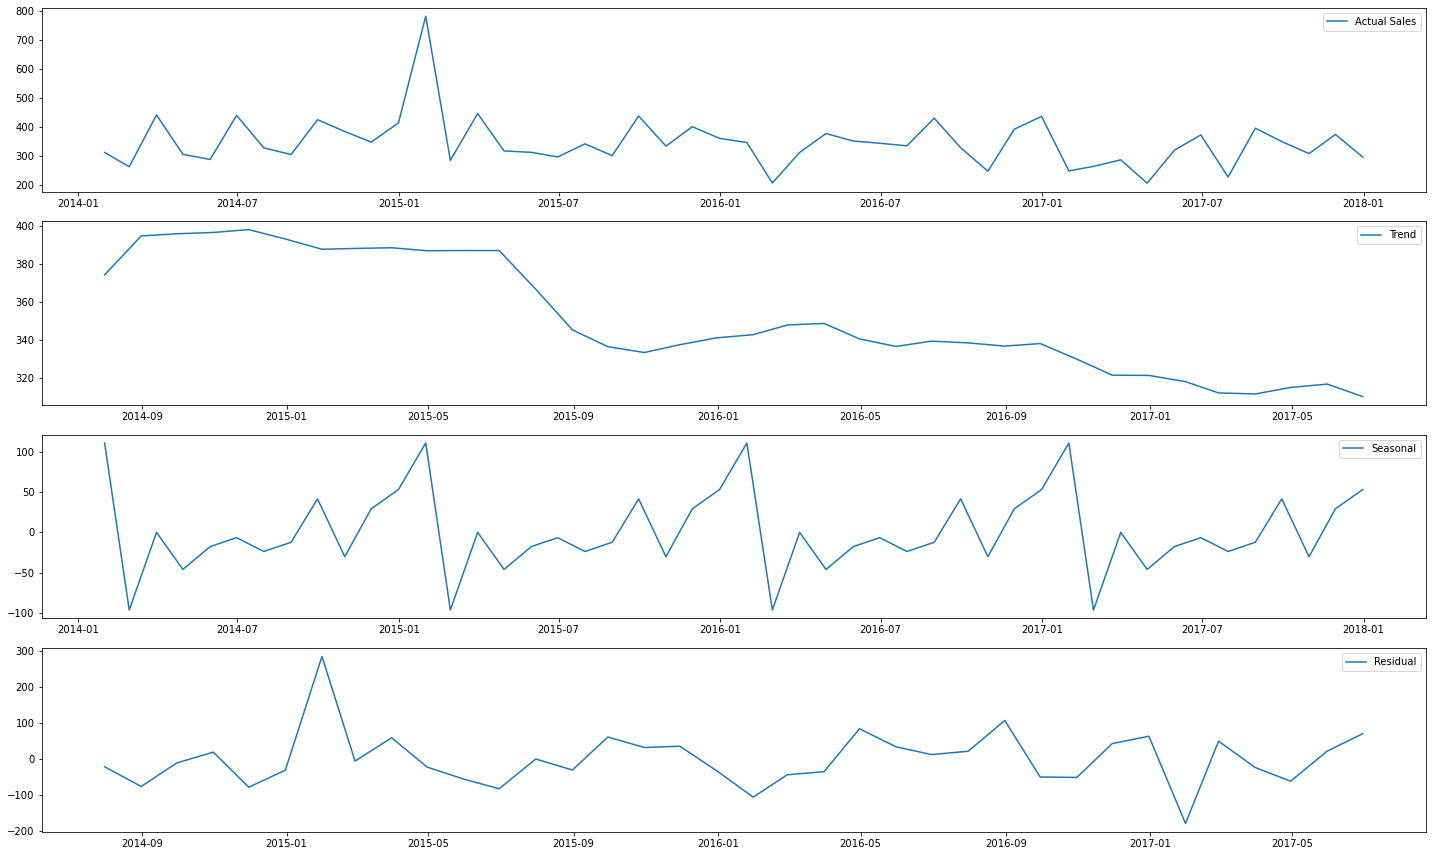

In [10]:
decomposition=seasonal_decompose(sales_df, period=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales_df,label='Actual Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

* We can see a downward trend in sales.
* We can see a yearly seasonality of the data.

### Task 2: 
1. Check data for satationarity
2. Plot ACF and PACF.
3. Adjust the values of p and q to get the most accurate model. This is done using corr-validation(Avoid using the auto_arima model at this stage.)

In [11]:
# check for Stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make it stationary"
        
    return(ret)
checkStationarity(sales_df)

'Data is Stationary. Proceed to model building'

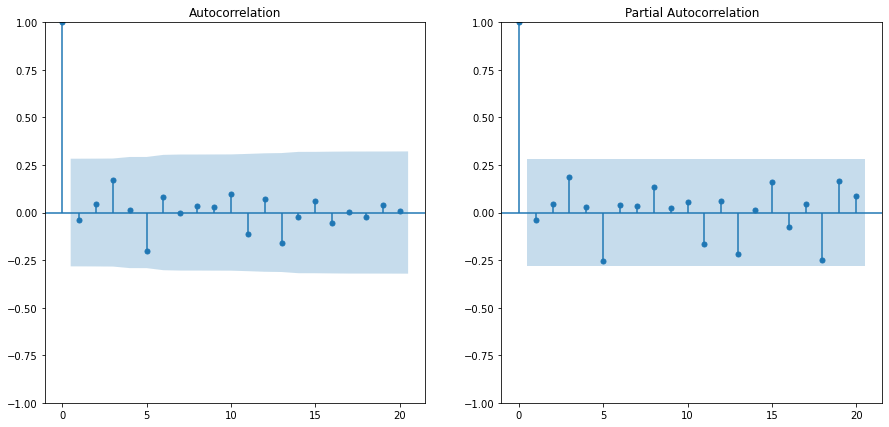

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(sales_df,lags=20,ax=ax[0])
plot_pacf(sales_df,lags=20,ax=ax[1])
plt.show()

* In Autocorrelation graph 1 point is outside error zone. Thus q=1.
* In Partial Autocorrelation graph 1 point is ouside error zone. Thus p=1.

In [13]:
# split the data into train and test
split = int(0.7 * len(sales_df))

train = sales_df.iloc[:split]
test = sales_df.iloc[split:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 33, test = 15


### Task 3 : 
1. Build the ARIMA model.
2. Summarize the model.
3. Forecast using the model.

In [14]:
# checking best p & q value for model building
for p in range(2):
    for q in range(2):
        arima_c=ARIMA(train,order=(p,0,q)).fit()
        aic_c=arima_c.aic
        print('ARIMA Model : ',p,'0',q, 'AIC : ',aic_c)
        print(10*'======')

ARIMA Model :  0 0 0 AIC :  397.34883985580467
ARIMA Model :  0 0 1 AIC :  399.0853764588748
ARIMA Model :  1 0 0 AIC :  399.04892691866183
ARIMA Model :  1 0 1 AIC :  400.67649751153783


* We can see at p=0 & q=0 the AIC(397.34) is coming lowest compared to other p,q value combination. So we can consider p=0
  q=0 for further model building.

In [15]:
# building the arima model with optimised p & q value
p=0
d=0
q=0
arima=ARIMA(train, order=(p,d,q)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                          ARIMA   Log Likelihood                -196.674
Date:                Mon, 26 Dec 2022   AIC                            397.349
Time:                        16:20:36   BIC                            400.342
Sample:                    01-31-2014   HQIC                           398.356
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.7553     25.196     14.318      0.000     311.372     410.139
sigma2      8788.3290   1373.987      6.396      0.000    6095.364    1.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               170.17
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             2.62
Prob(H) (two-sided):                  0.77   Kurtosis:                        12.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

predictions = arima.predict(start,end,typ='levels')
predictions

2016-10-31    360.755325
2016-11-30    360.755325
2016-12-31    360.755325
2017-01-31    360.755325
2017-02-28    360.755325
2017-03-31    360.755325
2017-04-30    360.755325
2017-05-31    360.755325
2017-06-30    360.755325
2017-07-31    360.755325
2017-08-31    360.755325
2017-09-30    360.755325
2017-10-31    360.755325
2017-11-30    360.755325
2017-12-31    360.755325
Freq: M, Name: predicted_mean, dtype: float64

In [17]:
# calculating errors
actual = []
pred = []

for i in range(len(predictions)):
    actual.append(test.Sales[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,err
0,247.345354,360.755325,-113.409971
1,392.390479,360.755325,31.635154
2,436.651369,360.755325,75.896044
3,248.501333,360.755325,-112.253992
4,264.089900,360.755325,-96.665425
5,286.669600,360.755325,-74.085725
6,206.044502,360.755325,-154.710823
7,319.953928,360.755325,-40.801397
8,372.717386,360.755325,11.962061
9,227.173500,360.755325,-133.581825


<AxesSubplot:>

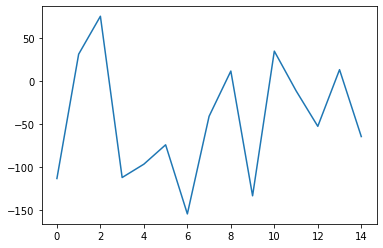

In [18]:
# errors
df_res.err.plot()

In [19]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(arima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [20]:
# MSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(0,0,0)
	MSE = 6606.781916899461
	RMSE = 81.28211314243411


Text(0.5, 1.0, 'ARIMA Model. Order=(0,0,0)')

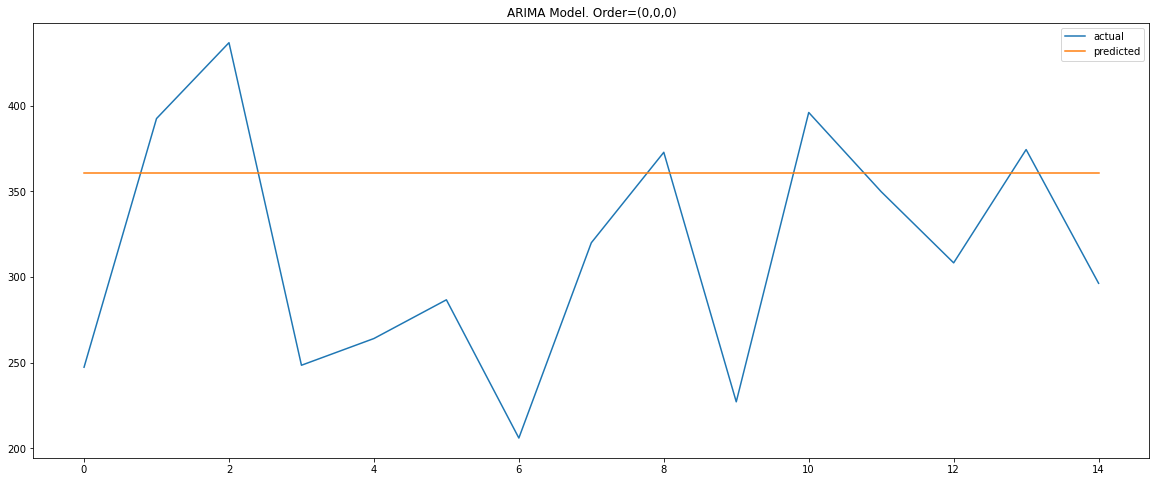

In [21]:
df_res.actual.plot(figsize=(20,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

* We can see that the predcited graph shows almost no change over time. This maybe because ARIMA model does include the seasonality of the data.

### Task 5: 
1. Build the SARIMA model.
2. Predict the sales figures using test data.
3. Forecaste using the model.
4. Write your observation about the two models you have built during this challenge.

In [22]:
# checking best p & q value using sarima model
for p in range(2):
    for q in range(2):
        sarima_c=SARIMAX(sales_df,order=(p,0,q),seasonal_order=(1,0,1,12)).fit()
        saic_c=sarima_c.aic
        print('SARIMA Model : ',p,'0',q, 'AIC : ',saic_c)
        print(10*'==========')

SARIMA Model :  0 0 0 AIC :  622.5145989936889
SARIMA Model :  0 0 1 AIC :  620.2558390002755
SARIMA Model :  1 0 0 AIC :  603.7982787743804
SARIMA Model :  1 0 1 AIC :  583.975297011826


* We can see at p=1 & q=1 the AIC(583.53) is coming lowest compared to other p,q value combination. So we can consider p=1
  q=1 for further model building.

In [23]:
# building sarima model
p=1
d=0
q=1
sarima=SARIMAX(sales_df,order=(p,0,q),seasonal_order=(1,0,1,12)).fit()
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -286.988
Date:                            Mon, 26 Dec 2022   AIC                            583.975
Time:                                    16:21:21   BIC                            593.331
Sample:                                01-31-2014   HQIC                           587.511
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.056     17.972      0.000       0.890       1.108
ma.L1         -0.9286      0.261     -3.558      0.000      -1.440      -0.417
ar.S.L12       0.9915      1.919      0.517      0.605      -2.769       4.752
ma.S.L12      -0.9705      3.603     -0.269      0.788      -8.032       6.092
sigma2      8121.4942   1.27e+04      0.641      0.521   -1.67e+04    3.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               145.06
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.97
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# predictions
start1 = len(train) 
end1 = len(train) + len(test) - 1

predictions1 = sarima.predict(start1,end1,typ='levels')
predictions1

date
2016-10-31    354.631286
2016-11-30    348.422426
2016-12-31    352.555874
2017-01-31    371.020036
2017-02-28    334.006220
2017-03-31    347.566227
2017-04-30    335.135189
2017-05-31    324.183095
2017-06-30    329.159297
2017-07-31    329.067179
2017-08-31    323.385178
2017-09-30    334.740490
2017-10-31    326.415428
2017-11-30    332.491970
2017-12-31    338.285958
Freq: M, Name: predicted_mean, dtype: float64

In [25]:
# calculation of error
actual1 = []
pred1 = []

for i in range(len(predictions1)):
    actual1.append(test.Sales[i])
    pred1.append(predictions1[i])

df_res1 = pd.DataFrame({'actual':actual1, 'predicted':pred1})
df_res1['err'] = df_res1.actual - df_res1.predicted
df_res1

,actual,predicted,err
0,247.345354,354.631286,-107.285932
1,392.390479,348.422426,43.968053
2,436.651369,352.555874,84.095495
3,248.501333,371.020036,-122.518702
4,264.089900,334.006220,-69.916320
5,286.669600,347.566227,-60.896627
6,206.044502,335.135189,-129.090686
7,319.953928,324.183095,-4.229167
8,372.717386,329.159297,43.558089
9,227.173500,329.067179,-101.893679


<AxesSubplot:>

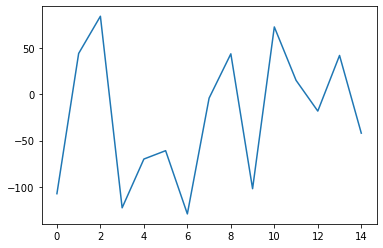

In [26]:
# errors
df_res1.err.plot()

In [27]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [32]:
# MSE
msg1 = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res1.actual, df_res1.predicted)
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(mse2,np.sqrt(mse2)))

SARIMA Model. Order=(1,0,1)
	MSE = 5494.504036729573
	RMSE = 74.12492183287327


Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

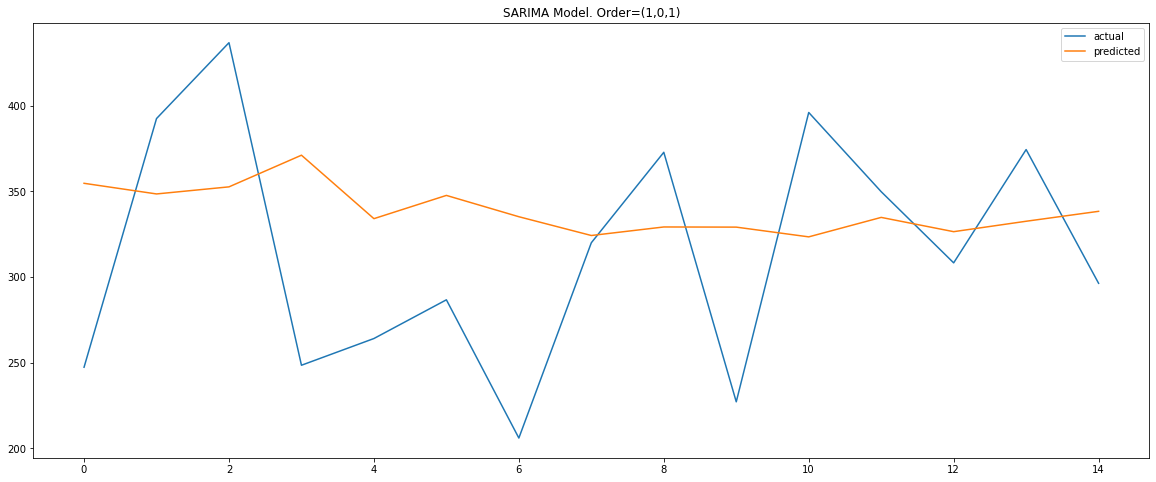

In [33]:
# actual vs predicted 
df_res1.actual.plot(figsize=(20,8),legend=True)
df_res1.predicted.plot(legend=True)
plt.title(msg1)

* We can see very small changes in prediction graph according to the actual graph. In SARIMA model we have included seasonality during model generation.

In [34]:
# forecast into the future for next 18 months
fcast1 = sarima.predict(start=len(sales_df), end=len(sales_df)+18, typ='levels')
fcast1.head()

2018-01-31    339.757656
2018-02-28    313.292769
2018-03-31    331.737345
2018-04-30    320.702050
2018-05-31    323.374826
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

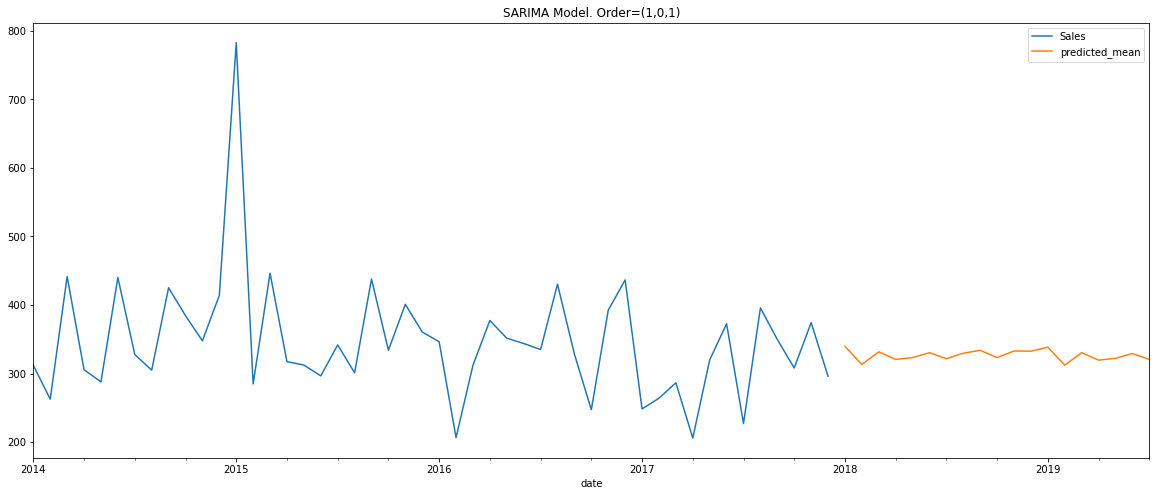

In [35]:
# forecasted data
sales_df.plot(figsize=(20,8),legend=True)
fcast1.plot(legend=True)
plt.title(msg1)

### In 2018, 1st month sales will decreasing then it will increase and become stable untill 1st month of 2019.